# Extracting sentiments and trends by Tinder App Store Review

<span style="color: blue; font-size: 18pt">
1. 필요한 모듈 임포트하기
</span>

In [1]:
import nltk
import pandas as pd

<span style="color: blue; font-size: 18pt">
2. 자연어 처리에 사용할 .txt 파일 만들기
</span>

우선 원본 데이터셋을 가져옵니다.

In [2]:
file_path = "C:/Users/user/Downloads/final/2_Original Dataset(1).csv"
df = pd.read_csv(file_path)

자연어 처리에 이용할 'content' 컬럼만 추출해 .txt 파일로 만듭니다. (원본 데이터셋 크기가 너무 커서 개인 노트북으로 주피터에서 실행하기에 한계가 있어, .txt 파일로 추출할 때는 랜덤 샘플링 하여 용량을 줄였습니다.)

In [3]:
# 랜덤 샘플링
sampled_content = df['content'].sample(frac=0.01, random_state=1)

# 샘플링된 데이터를 txt 파일로 저장할 경로
sampled_output_path = 'C:/Users/user/Downloads/final/3_tinder_reviews_content.txt'

# 행별로 분리하여 txt 파일로 저장
with open(sampled_output_path, 'w', encoding='utf-8') as file:
    for content in sampled_content:
        file.write(str(content) + '\n')

sampled_output_path

'C:/Users/user/Downloads/final/3_tinder_reviews_content.txt'

<span style="color: blue; font-size: 18pt">
3. 파일을 읽은 후 문장 토큰화
</span>

In [4]:
# 파일 읽어오기
with open(sampled_output_path, 'r', encoding='utf-8') as file:
    sentence = file.read()

In [5]:
print(sentence)

Awesome!
This application is really nice.
too many false statements
Fake app
It's ok
Cool
I was banned for no reason. I hadn't even mat had with anyone and I was 
banned without notification.
Most popular date site
nice app
Hey I haven't downloaded this yet I'm 13 can I use the app Google says I can idk tho
Doesny works now
Randomly sends an email in german for no reason. Sometimes the next time you open the app, you need to swipe through the same people. Very annoying. Poor photo quality - photo compression too aggressive. Not up to current standarts.
Its ok
As a direct application with so many bugs... I'd give negative 10 stars, if I could.
Awesome
Nice
My tinder was working and it stopped not impressed
It's helpful
Worst in getting contracts
These kids are alright
Wurde gesperrt... Tinder war echt eine super App, aber nachdem ich gesperrt wurde konnte ich nichts mehr machen. Das Ding ist: ich wurde grundlos gesperrt und keine Ahnung was ich jetzt machen soll.
Great experience
Good
W

In [6]:
# 문장 토큰화 하기
from nltk.tokenize.regexp import RegexpTokenizer

tokenizer = RegexpTokenizer( "[\w']+") 
tinder_token = tokenizer.tokenize(sentence) 

In [7]:
print(tinder_token)

['Awesome', 'This', 'application', 'is', 'really', 'nice', 'too', 'many', 'false', 'statements', 'Fake', 'app', "It's", 'ok', 'Cool', 'I', 'was', 'banned', 'for', 'no', 'reason', 'I', "hadn't", 'even', 'mat', 'had', 'with', 'anyone', 'and', 'I', 'was', 'banned', 'without', 'notification', 'Most', 'popular', 'date', 'site', 'nice', 'app', 'Hey', 'I', "haven't", 'downloaded', 'this', 'yet', "I'm", '13', 'can', 'I', 'use', 'the', 'app', 'Google', 'says', 'I', 'can', 'idk', 'tho', 'Doesny', 'works', 'now', 'Randomly', 'sends', 'an', 'email', 'in', 'german', 'for', 'no', 'reason', 'Sometimes', 'the', 'next', 'time', 'you', 'open', 'the', 'app', 'you', 'need', 'to', 'swipe', 'through', 'the', 'same', 'people', 'Very', 'annoying', 'Poor', 'photo', 'quality', 'photo', 'compression', 'too', 'aggressive', 'Not', 'up', 'to', 'current', 'standarts', 'Its', 'ok', 'As', 'a', 'direct', 'application', 'with', 'so', 'many', 'bugs', "I'd", 'give', 'negative', '10', 'stars', 'if', 'I', 'could', 'Awesome'

In [8]:
# 토큰화된 단어를 태깅 처리
tagged = nltk.pos_tag(tinder_token)

In [9]:
print(tagged)

[('Awesome', 'NNP'), ('This', 'DT'), ('application', 'NN'), ('is', 'VBZ'), ('really', 'RB'), ('nice', 'JJ'), ('too', 'RB'), ('many', 'JJ'), ('false', 'JJ'), ('statements', 'NNS'), ('Fake', 'NNP'), ('app', 'NN'), ("It's", 'NNP'), ('ok', 'IN'), ('Cool', 'NNP'), ('I', 'PRP'), ('was', 'VBD'), ('banned', 'VBN'), ('for', 'IN'), ('no', 'DT'), ('reason', 'NN'), ('I', 'PRP'), ("hadn't", 'VBD'), ('even', 'RB'), ('mat', 'NNS'), ('had', 'VBD'), ('with', 'IN'), ('anyone', 'NN'), ('and', 'CC'), ('I', 'PRP'), ('was', 'VBD'), ('banned', 'VBN'), ('without', 'IN'), ('notification', 'NN'), ('Most', 'RBS'), ('popular', 'JJ'), ('date', 'NN'), ('site', 'NN'), ('nice', 'JJ'), ('app', 'IN'), ('Hey', 'NNP'), ('I', 'PRP'), ("haven't", 'VBP'), ('downloaded', 'VBD'), ('this', 'DT'), ('yet', 'RB'), ("I'm", 'NNP'), ('13', 'CD'), ('can', 'MD'), ('I', 'PRP'), ('use', 'VB'), ('the', 'DT'), ('app', 'NN'), ('Google', 'NNP'), ('says', 'VBZ'), ('I', 'PRP'), ('can', 'MD'), ('idk', 'VB'), ('tho', 'JJ'), ('Doesny', 'NNP'), (

In [10]:
tagged[0:6]

[('Awesome', 'NNP'),
 ('This', 'DT'),
 ('application', 'NN'),
 ('is', 'VBZ'),
 ('really', 'RB'),
 ('nice', 'JJ')]

<span style="color: blue; font-size: 18pt">
4. 불용어 제거하기 
</span>

1. 불용어 사전 이용해 불용어 제거하기

In [11]:
from nltk.corpus import stopwords 

In [12]:
print("불용어 제거 전 단어 개수 :", len(tinder_token))

불용어 제거 전 단어 개수 : 93622


In [13]:
stop_1 = [ stop_word for stop_word in tinder_token   #불용어에 해당하면 stop_1 리스트에 추가
          if stop_word in stopwords.words() ]

In [14]:
result_1= [ each_word for each_word in tinder_token  #불용어에 해당하지 않으면 result_1 리스트에 추가
          if each_word not in stopwords.words() ]

In [15]:
print("불용어에 해당하는 단어 :", stop_1)
print("불용어에 해당하는 단어 :", len(stop_1))

불용어에 해당하는 단어 : ['is', 'really', 'too', 'many', 'ok', 'was', 'for', 'no', "hadn't", 'even', 'mat', 'had', 'with', 'anyone', 'and', 'was', 'without', "haven't", 'this', 'yet', 'can', 'use', 'the', 'says', 'can', 'idk', 'tho', 'now', 'an', 'in', 'for', 'no', 'the', 'next', 'you', 'the', 'you', 'need', 'to', 'through', 'the', 'same', 'people', 'too', 'up', 'to', 'ok', 'a', 'with', 'so', 'many', 'if', 'could', 'was', 'and', 'it', 'not', 'in', 'getting', 'are', 'war', 'eine', 'aber', 'ich', 'ich', 'nichts', 'machen', 'ist', 'ich', 'und', 'keine', 'was', 'ich', 'jetzt', 'machen', 'soll', 'let', 'me', 'log', 'in', 'just', 'got', 'my', 'trying', 'to', 'log', 'in', 'but', 'it', 'keeps', 'saying', 'to', 'do', 'this', 'like', 'it', 'went', 'even', 'let', 'me', 'my', 'in', 'get', 'nothing', 'nothing', 'about', 'this', 'if', 'you', 'want', 'a', 'good', 'you', 'might', 'as', 'well', 'but', 'as', 'many', 'as', 'as', 'it', 'only', 'you', 'to', 'maybe', 'people', 'out', 'of', 'that', 'people', 'you', 'c

In [16]:
print("불용어 제거 후 :", result_1)
print("불용어 제거 후 남은 단어 개수 :", len(result_1))

불용어 제거 후 : ['Awesome', 'This', 'application', 'nice', 'false', 'statements', 'Fake', 'app', "It's", 'Cool', 'I', 'banned', 'reason', 'I', 'I', 'banned', 'notification', 'Most', 'popular', 'date', 'site', 'nice', 'app', 'Hey', 'I', 'downloaded', "I'm", '13', 'I', 'app', 'Google', 'I', 'Doesny', 'works', 'Randomly', 'sends', 'email', 'german', 'reason', 'Sometimes', 'time', 'open', 'app', 'swipe', 'Very', 'annoying', 'Poor', 'photo', 'quality', 'photo', 'compression', 'aggressive', 'Not', 'current', 'standarts', 'Its', 'As', 'direct', 'application', 'bugs', "I'd", 'give', 'negative', '10', 'stars', 'I', 'Awesome', 'Nice', 'My', 'tinder', 'working', 'stopped', 'impressed', "It's", 'helpful', 'Worst', 'contracts', 'These', 'kids', 'alright', 'Wurde', 'gesperrt', 'Tinder', 'echt', 'super', 'App', 'nachdem', 'gesperrt', 'wurde', 'konnte', 'mehr', 'Das', 'Ding', 'wurde', 'grundlos', 'gesperrt', 'Ahnung', 'Great', 'experience', 'Good', 'Wont', 'Iv', 'sisters', 'phone', 'unable', 'put', 'number

2. 글자수로 불용어 제거하기

In [17]:
result_2 = []
for i in result_1 :
    if len(i) >= 2 and len(i) <= 10 :
        result_2.append(i) 
print("글자수가 2 이상이고, 10 이하인 단어만 추출 : ",result_2)
print("글자수로 불용어 제거 후 남은 단어 개수 :", len(result_2))

글자수가 2 이상이고, 10 이하인 단어만 추출 :  ['Awesome', 'This', 'nice', 'false', 'statements', 'Fake', 'app', "It's", 'Cool', 'banned', 'reason', 'banned', 'Most', 'popular', 'date', 'site', 'nice', 'app', 'Hey', 'downloaded', "I'm", '13', 'app', 'Google', 'Doesny', 'works', 'Randomly', 'sends', 'email', 'german', 'reason', 'Sometimes', 'time', 'open', 'app', 'swipe', 'Very', 'annoying', 'Poor', 'photo', 'quality', 'photo', 'aggressive', 'Not', 'current', 'standarts', 'Its', 'As', 'direct', 'bugs', "I'd", 'give', 'negative', '10', 'stars', 'Awesome', 'Nice', 'My', 'tinder', 'working', 'stopped', 'impressed', "It's", 'helpful', 'Worst', 'contracts', 'These', 'kids', 'alright', 'Wurde', 'gesperrt', 'Tinder', 'echt', 'super', 'App', 'nachdem', 'gesperrt', 'wurde', 'konnte', 'mehr', 'Das', 'Ding', 'wurde', 'grundlos', 'gesperrt', 'Ahnung', 'Great', 'experience', 'Good', 'Wont', 'Iv', 'sisters', 'phone', 'unable', 'put', 'number', 'Very', 'Helpful', 'Pay', '50', 'Also', 'special', 'app', 'experience', 'b

3. 직접 만든 불용어 사전으로 추가 불용어 제거하기

In [18]:
make_stopword = open("C:/Users/user/Downloads/final/3_stop_list_made.txt").read()
print(make_stopword)

app
tinder
It
I'm
This
It's
Tinder
The
They
I've
Its
App
So
You
And
and
Also
Don't
I'd
As
I'll
These
Doesn't
If
Ive
Dont





In [19]:
stop_3 = [ stop_word for stop_word in result_2   #불용어에 해당하면 stop 리스트에 추가
          if stop_word in make_stopword ]

result_3= [ each_word for each_word in result_2  #불용어에 해당하지 않으면 result_1 리스트에 추가
          if each_word not in make_stopword ]

print("직접 만든 불용어에 해당하는 단어 :", stop_3)
print("직접 만든 불용어 제거 후         :", result_3)
print("직접 만든 불용어 제거 후 남은 단어 개수 :", len(result_3))

직접 만든 불용어에 해당하는 단어 : ['This', 'app', "It's", 'app', "I'm", 'app', 'app', 'Its', 'As', "I'd", 'tinder', "It's", 'These', 'Tinder', 'App', 'Iv', 'Also', 'app', 'So', "Don't", 'tinder', 'The', 'app', 'As', 'tinder', 'The', 'It', "I've", 'Tinder', 'tinder', 'Also', 'tinder', 'tinder', 'tinder', "I'll", 'It', 'app', 'app', 'The', 'app', 'app', 'They', 'app', 'app', 'app', 'It', 'tinder', "I've", "I've", 'Tinder', 'Tinder', 'app', "I'm", 'app', 'Its', 'You', "I'm", "I'm", "I'm", "It's", 'It', 'app', 'They', "It's", 'app', 'The', 'Tinder', 'Tinder', 'app', 'tinder', 'It', 'tinder', "Doesn't", 'If', 'The', 'These', "I'm", 'tinder', "I'd", 'app', 'It', 'So', 'app', 'app', 'App', 'Tinder', 'It', 'The', 'app', 'So', 'tinder', 'tinder', "It's", 'app', 'app', 'app', 'app', 'So', "I've", 'tinder', 'It', 'Dont', 'app', 'Its', 'app', 'It', 'This', 'app', 'app', "It's", 'Does', 'app', 'tinder', 'This', 'app', 'app', 'app', 'app', 'Ive', "I'm", 'tinder', "I'd", 'And', "It's", 'app', 'tinder', 'app', 'ap

<span style="color: magenta; font-size: 18pt">
추출한 단어에서 명사만 추출하기
</span>

In [20]:
# 품사 태깅
Tagged = nltk.pos_tag(result_3)

In [21]:
print(Tagged)

[('Awesome', 'NNP'), ('nice', 'JJ'), ('false', 'JJ'), ('statements', 'NNS'), ('Fake', 'NNP'), ('Cool', 'NNP'), ('banned', 'VBD'), ('reason', 'NN'), ('banned', 'VBD'), ('Most', 'JJS'), ('popular', 'JJ'), ('date', 'NN'), ('site', 'NN'), ('nice', 'JJ'), ('Hey', 'NNP'), ('downloaded', 'VBD'), ('13', 'CD'), ('Google', 'NNP'), ('Doesny', 'NNP'), ('works', 'VBZ'), ('Randomly', 'NNP'), ('sends', 'VBZ'), ('email', 'JJ'), ('german', 'JJ'), ('reason', 'NN'), ('Sometimes', 'NNP'), ('time', 'NN'), ('open', 'JJ'), ('swipe', 'JJ'), ('Very', 'NNP'), ('annoying', 'VBG'), ('Poor', 'NNP'), ('photo', 'NN'), ('quality', 'NN'), ('photo', 'NN'), ('aggressive', 'JJ'), ('Not', 'RB'), ('current', 'JJ'), ('standarts', 'NNS'), ('direct', 'JJ'), ('bugs', 'NNS'), ('give', 'VBP'), ('negative', 'JJ'), ('10', 'CD'), ('stars', 'NNS'), ('Awesome', 'NNP'), ('Nice', 'NNP'), ('My', 'NNP'), ('working', 'VBG'), ('stopped', 'VBD'), ('impressed', 'JJ'), ('helpful', 'JJ'), ('Worst', 'NNP'), ('contracts', 'NNS'), ('kids', 'NNS')

In [22]:
# 명사 추출
nouns_en = [word for word, pos in Tagged if pos in ["NN", "NNS", "NNP", "NNPS"]]

In [23]:
print(len(nouns_en))

19092


In [24]:
print(nouns_en)

['Awesome', 'statements', 'Fake', 'Cool', 'reason', 'date', 'site', 'Hey', 'Google', 'Doesny', 'Randomly', 'reason', 'Sometimes', 'time', 'Very', 'Poor', 'photo', 'quality', 'photo', 'standarts', 'bugs', 'stars', 'Awesome', 'Nice', 'My', 'Worst', 'contracts', 'kids', 'Wurde', 'gesperrt', 'echt', 'nachdem', 'gesperrt', 'wurde', 'konnte', 'mehr', 'Das', 'Ding', 'wurde', 'grundlos', 'gesperrt', 'Ahnung', 'Great', 'experience', 'Good', 'Wont', 'sisters', 'phone', 'put', 'number', 'Very', 'Helpful', 'Pay', 'experience', 'boosts', 'times', 'shows', 'money', 'premium', 'gold', 'cus', 'time', 'boosts', 'How', 'greedy', 'developers', 'review', 'account', 'reason', 'side', 'facebook', 'Facebook', 'OPTIONAL', 'select', 'share', 'step', 'code', 'Newsflash', 'cell', 'phone', 'phones', 'money', 'provider', 'Awesome', 'Loved', 'life', 'time', 'lot', 'breakup', 'havw', 'years', 'hookups', 'ONS', 'life', 'experience', 'team', 'platform', 'Thank', 'Every', 'time', 'stop', 'shows', 'message', 'Please', '

<span style="color: blue; font-size: 18pt">
5. 추출된 단어의 출력 빈도수 산출하기
</span>

In [25]:
from collections import Counter

freq_result = Counter(result_3) #단어별 빈도수 생성
print(freq_result)
print(type(freq_result))

Counter({'account': 401, 'time': 360, 'banned': 349, 'matches': 319, 'Good': 274, 'money': 249, 'pay': 249, 'fake': 215, 'match': 210, 'reason': 202, 'profile': 190, 'profiles': 189, 'great': 182, 'Great': 161, 'dating': 152, 'back': 152, 'Nice': 149, 'phone': 149, 'Not': 147, 'likes': 147, 'message': 136, 'messages': 135, 'Facebook': 134, 'work': 134, 'find': 130, 'make': 130, 'fix': 129, 'nice': 126, 'meet': 124, 'give': 123, 'love': 122, 'update': 118, 'Very': 115, 'waste': 115, 'times': 111, 'gold': 110, 'No': 109, 'works': 107, 'bots': 105, 'open': 104, 'number': 104, "Can't": 101, 'fun': 101, 'login': 98, 'lot': 95, 'problem': 95, 'swipe': 94, 'service': 94, 'working': 93, 'free': 93, 'wrong': 89, 'days': 89, 'apps': 87, 'person': 86, 'friends': 84, 'sign': 83, 'experience': 81, 'real': 80, 'Just': 80, 'easy': 79, 'guys': 78, 'Awesome': 76, 'Please': 76, 'error': 76, 'month': 73, 'accounts': 73, 'months': 72, 'support': 72, 'paid': 71, 'women': 71, 'My': 70, 'send': 70, 'girls': 

In [26]:
li_desc_freq_result = freq_result.most_common() 
print(li_desc_freq_result)
print(type(li_desc_freq_result))

[('account', 401), ('time', 360), ('banned', 349), ('matches', 319), ('Good', 274), ('money', 249), ('pay', 249), ('fake', 215), ('match', 210), ('reason', 202), ('profile', 190), ('profiles', 189), ('great', 182), ('Great', 161), ('dating', 152), ('back', 152), ('Nice', 149), ('phone', 149), ('Not', 147), ('likes', 147), ('message', 136), ('messages', 135), ('Facebook', 134), ('work', 134), ('find', 130), ('make', 130), ('fix', 129), ('nice', 126), ('meet', 124), ('give', 123), ('love', 122), ('update', 118), ('Very', 115), ('waste', 115), ('times', 111), ('gold', 110), ('No', 109), ('works', 107), ('bots', 105), ('open', 104), ('number', 104), ("Can't", 101), ('fun', 101), ('login', 98), ('lot', 95), ('problem', 95), ('swipe', 94), ('service', 94), ('working', 93), ('free', 93), ('wrong', 89), ('days', 89), ('apps', 87), ('person', 86), ('friends', 84), ('sign', 83), ('experience', 81), ('real', 80), ('Just', 80), ('easy', 79), ('guys', 78), ('Awesome', 76), ('Please', 76), ('error',

In [27]:
# 리스트->딕셔너리로 변환
dic_desc_freq_result = dict(li_desc_freq_result) 
print(dic_desc_freq_result)
print(type(dic_desc_freq_result))

{'account': 401, 'time': 360, 'banned': 349, 'matches': 319, 'Good': 274, 'money': 249, 'pay': 249, 'fake': 215, 'match': 210, 'reason': 202, 'profile': 190, 'profiles': 189, 'great': 182, 'Great': 161, 'dating': 152, 'back': 152, 'Nice': 149, 'phone': 149, 'Not': 147, 'likes': 147, 'message': 136, 'messages': 135, 'Facebook': 134, 'work': 134, 'find': 130, 'make': 130, 'fix': 129, 'nice': 126, 'meet': 124, 'give': 123, 'love': 122, 'update': 118, 'Very': 115, 'waste': 115, 'times': 111, 'gold': 110, 'No': 109, 'works': 107, 'bots': 105, 'open': 104, 'number': 104, "Can't": 101, 'fun': 101, 'login': 98, 'lot': 95, 'problem': 95, 'swipe': 94, 'service': 94, 'working': 93, 'free': 93, 'wrong': 89, 'days': 89, 'apps': 87, 'person': 86, 'friends': 84, 'sign': 83, 'experience': 81, 'real': 80, 'Just': 80, 'easy': 79, 'guys': 78, 'Awesome': 76, 'Please': 76, 'error': 76, 'month': 73, 'accounts': 73, 'months': 72, 'support': 72, 'paid': 71, 'women': 71, 'My': 70, 'send': 70, 'girls': 70, 'awa

<span style="color: blue; font-size: 18pt">
6. 추출된 단어의 출력 빈도수 시각화 
</span>

1. 리스트 타입 데이터를 기반으로 그래프 시각화

In [28]:
print(type(result_3))

<class 'list'>


In [29]:
text_graph = nltk.Text(result_3) 
print(text_graph) 
print(type(text_graph))

<Text: Awesome nice false statements Fake Cool banned reason...>
<class 'nltk.text.Text'>


In [30]:
# 필요한 모듈 임포트
import matplotlib.pyplot as plt 

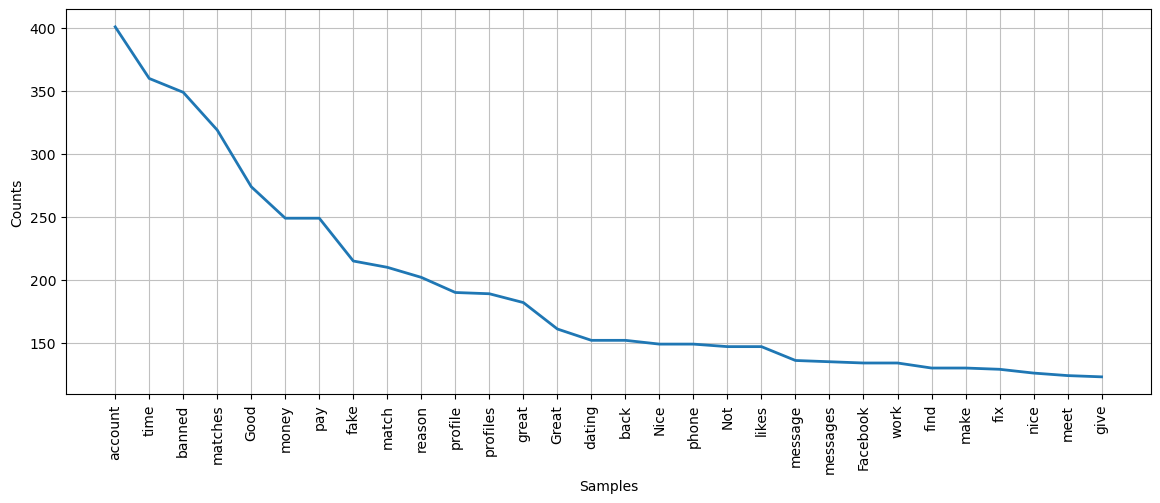

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [31]:
plt.rcParams["figure.figsize"] = (14,5) 
plt.rcParams['axes.grid'] = False 
text_graph.plot(30) 

2. 딕셔너리 타입 데이터를 기반으로 그래프 시각화

In [32]:
print(type(dic_desc_freq_result)) 

<class 'dict'>


In [33]:
# 한글 사용을 위해 임포트
import matplotlib.font_manager as fm  
import matplotlib

font_location="c:/windows/fonts/HMKMMAG.TTF"  
font_name=fm.FontProperties(fname=font_location).get_name() 

matplotlib.rc('font',family=font_name) #한글 깨짐 방지

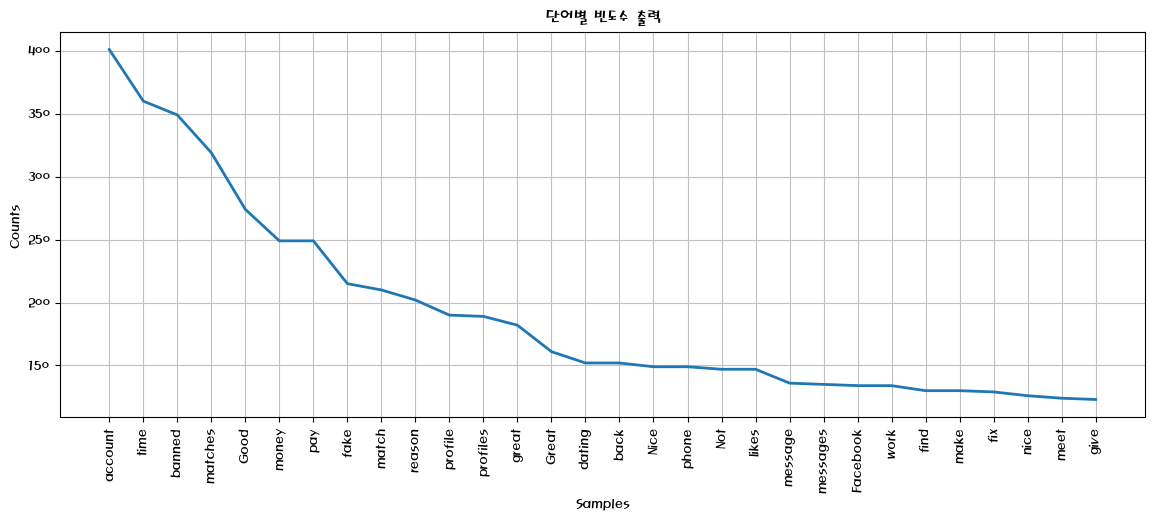

<AxesSubplot:title={'center':'단어별 빈도수 출력'}, xlabel='Samples', ylabel='Counts'>

In [34]:
plt.title('단어별 빈도수 출력') 

from nltk.probability import FreqDist

final_graph = FreqDist(dic_desc_freq_result)
final_graph.plot(30) 

<span style="color: blue; font-size: 18pt">
7. 워드클라우드를 이용한 단어 빈도수 시각화 
</span>

In [35]:
from wordcloud import WordCloud
wordcloud = WordCloud(font_path='c:/windows/fonts/HMKMMAG.TTF' ,
                      relative_scaling = 0.5 ,
                      background_color='white' ).generate_from_frequencies(dic_desc_freq_result) #딕셔너리 타입 이용

이미지 크기 :  Figure(1000x600)


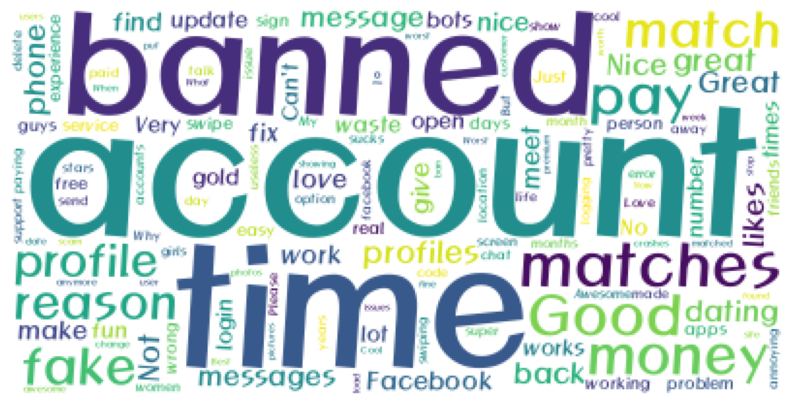

In [36]:
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['axes.grid'] = False

#이미지 크기
fig = plt.figure()
print("이미지 크기 : ", fig)

# 화면에 출력 
plt.imshow(wordcloud)
plt.axis('off')

fig.savefig('C:/Users/user/Downloads/final/3_tinder_image.png')

<span style="color: magenta; font-size: 18pt">
명사의 출력 빈도수만 산출하기
</span>

In [37]:
from collections import Counter

freq_result_noun = Counter(nouns_en) #단어별 빈도수 생성
print(freq_result_noun)
print(type(freq_result_noun))

Counter({'time': 360, 'account': 360, 'matches': 297, 'money': 249, 'reason': 202, 'Good': 193, 'pay': 179, 'profiles': 175, 'match': 170, 'Great': 160, 'phone': 149, 'Nice': 146, 'Facebook': 133, 'message': 128, 'messages': 125, 'work': 110, 'times': 108, 'waste': 106, 'number': 104, "Can't": 101, 'problem': 95, 'likes': 94, 'meet': 93, 'profile': 92, 'service': 92, 'days': 89, 'bots': 86, 'person': 86, 'Very': 84, 'lot': 83, 'No': 80, 'gold': 77, 'Please': 76, 'Awesome': 75, 'experience': 75, 'Just': 74, 'month': 73, 'months': 72, 'accounts': 71, 'women': 71, 'fun': 70, 'support': 69, 'Love': 67, 'day': 67, 'My': 65, 'option': 65, 'years': 64, 'sign': 64, 'login': 64, 'friends': 63, 'guys': 60, 'error': 60, 'fix': 60, 'love': 59, 'girls': 59, 'location': 57, 'life': 55, 'Worst': 52, 'week': 52, 'stars': 51, 'code': 49, 'talk': 49, 'issue': 48, 'customer': 48, 'site': 47, 'issues': 47, 'Cool': 45, 'photos': 44, 'crashes': 44, 'date': 43, 'users': 43, 'Best': 43, 'problems': 43, 'faceb

<span style="color: magenta; font-size: 18pt">
명사 출력 빈도수를 시각화하기 
</span>

리스트 타입 데이터를 기반으로 명사 빈도수 그래프 시각화

In [38]:
print(type(nouns_en))

<class 'list'>


In [39]:
noun_graph = nltk.Text(nouns_en) 
print(noun_graph) 
print(type(noun_graph))

<Text: Awesome statements Fake Cool reason date site Hey...>
<class 'nltk.text.Text'>


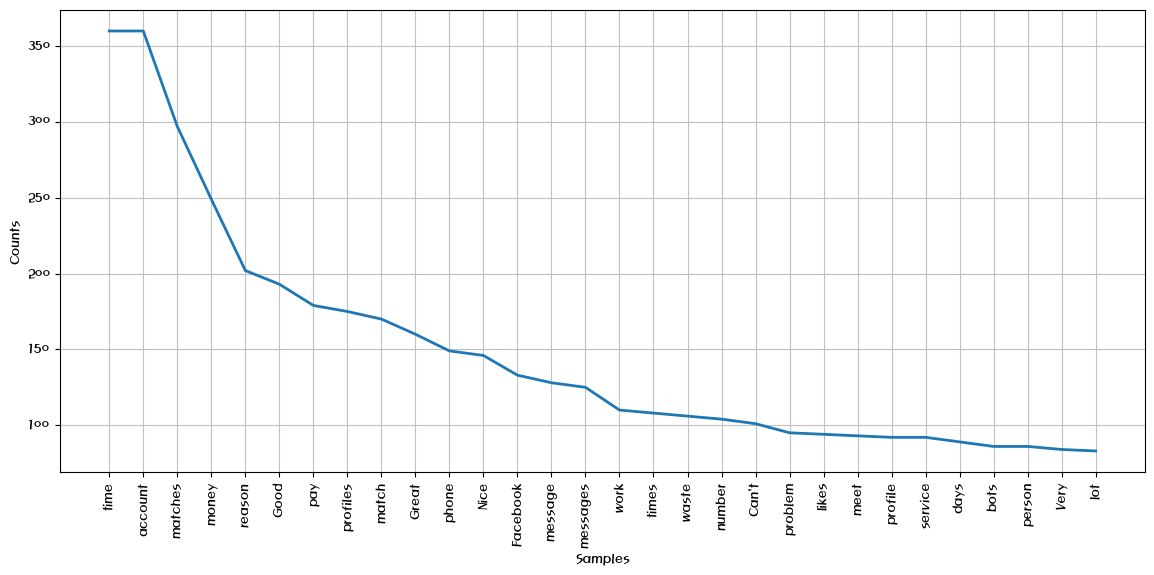

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [40]:
plt.rcParams["figure.figsize"] = (14,6) 
plt.rcParams['axes.grid'] = False 
noun_graph.plot(30) 